<a href="https://colab.research.google.com/github/azzazhr/Machine_Learning/blob/main/TugasPrakJB5_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Nama : Azzahra Attaqina**

### **NIM  : 2341720224**

### **Kelas : TI-3B**

 **TUGAS PRAKTIKUM JOBSHEET 5**

# **Langkah 1 - Import Library dan Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hdbscan
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# Memuat dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

print('Dimensi data:', X.shape)

/usr/local/lib/python3.12/dist-packages/hdbscan/plots.py:448: SyntaxWarning: invalid escape sequence '\l'
  axis.set_ylabel('$\lambda$ value')
/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.


Dimensi data: (150, 4)


# **Langkah 2 - Clustering dengan HDBSCAN**

In [2]:
# Membuat objek HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)

# Melakukan clustering
clusterer.fit(X)

# Mendapatkan label hasil clustering
# Label -1 menunjukkan noise
labels = clusterer.labels_

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


# **Langkah 3 - Laporan Hasil Klasterisasi**

**Jumlah Cluster yang Terbentuk**

In [3]:
# Menghitung jumlah cluster (tidak termasuk noise)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f'Jumlah cluster yang terbentuk: {n_clusters}')

Jumlah cluster yang terbentuk: 2


**Banyaknya Noise**

In [4]:
# Menghitung jumlah noise
n_noise = list(labels).count(-1)
print(f'Banyaknya noise: {n_noise}')

Banyaknya noise: 0


**Visualisasi Hasil Klasterisasi**

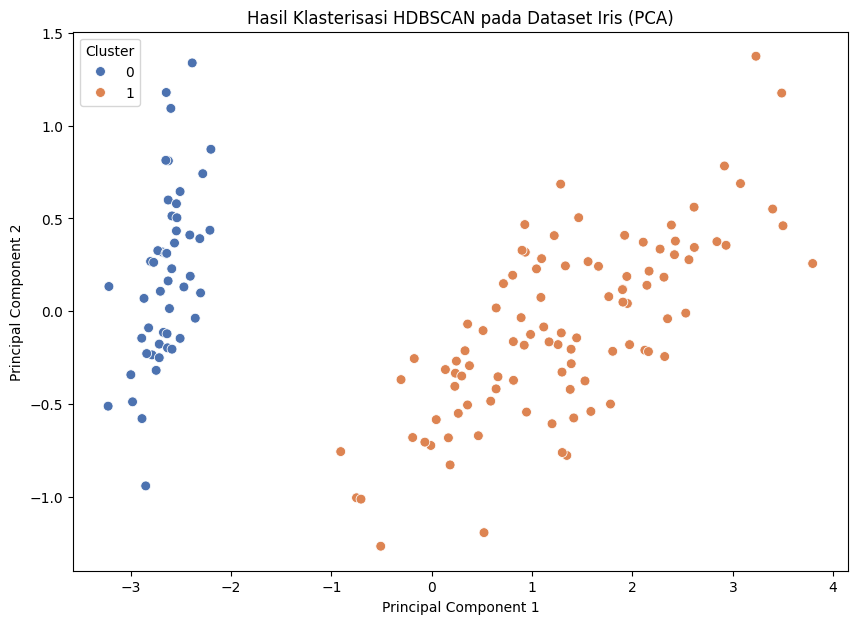

In [5]:
# Reduksi dimensi menggunakan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Membuat dataframe untuk plotting
df = pd.DataFrame({
    'x': X_pca[:, 0],
    'y': X_pca[:, 1],
    'cluster': labels
})

# Visualisasi
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='x', y='y', hue='cluster', palette='deep', s=50)
plt.title('Hasil Klasterisasi HDBSCAN pada Dataset Iris (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# **Langkah 4 - Analisis Singkat Hasil Klasterisasi**

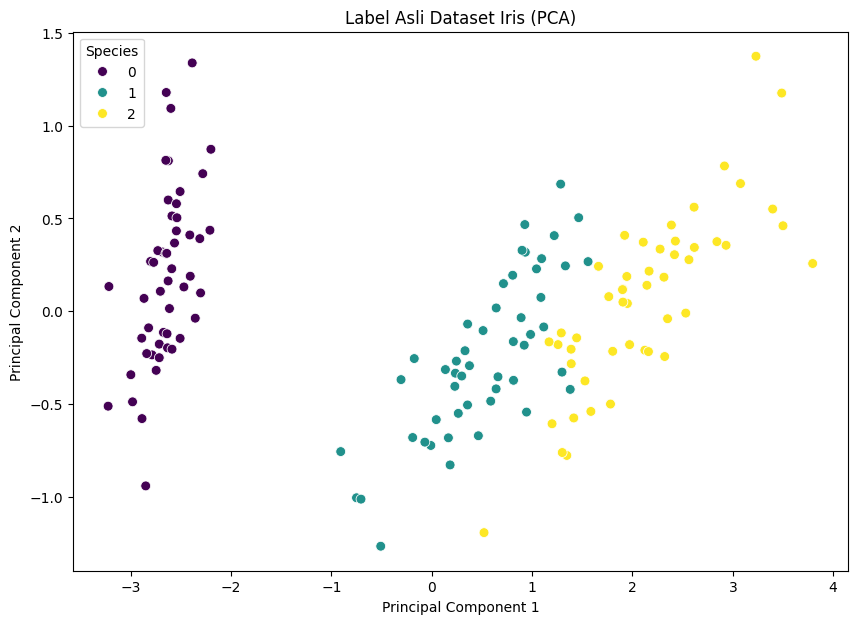

In [6]:
# Membuat dataframe dengan label asli
df_true = pd.DataFrame({
    'x': X_pca[:, 0],
    'y': X_pca[:, 1],
    'species': y
})

# Visualisasi dengan label asli
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_true, x='x', y='y', hue='species', palette='viridis', s=50)
plt.title('Label Asli Dataset Iris (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Species')
plt.show()

**Analisis:**

Dari perbandingan kedua visualisasi, kita dapat menyimpulkan:

- Kesesuaian dengan Label Asli: Hasil klasterisasi HDBSCAN kurang sesuai dengan 3 kelas asli dari dataset Iris. HDBSCAN hanya berhasil mengidentifikasi 2 cluster utama.

- Identifikasi Cluster: Cluster 0 (warna biru pada grafik pertama) tampaknya berhasil memisahkan salah satu spesies bunga Iris (kemungkinan besar Setosa) dengan sangat baik, yang memang secara alami terpisah dari dua spesies lainnya.

- Noise: Sebagian besar data dari dua spesies lainnya (Versicolor dan Virginica) dianggap sebagai noise (label -1, titik abu-abu). Ini terjadi karena kedua spesies tersebut memiliki karakteristik yang tumpang tindih dan tidak membentuk cluster yang cukup padat menurut kriteria HDBSCAN dengan parameter default.

**Kesimpulan:**

HDBSCAN, yang merupakan algoritma berbasis kepadatan, cenderung kesulitan pada dataset seperti Iris di mana beberapa kelas tidak terpisah dengan jelas dan memiliki kepadatan yang bervariasi. Algoritma ini lebih cocok untuk menemukan cluster dengan bentuk arbitrer dan mengidentifikasi outliers, namun dalam kasus ini, ia menganggap sebagian besar data yang tumpang tindih sebagai noise. Untuk mendapatkan hasil yang lebih baik, mungkin diperlukan eksperimen lebih lanjut dengan hyperparameter seperti min_cluster_size dan min_samples.
